In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## EDA:

In [2]:
df = pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
#Statistical summary
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
df.shape

(1000, 40)

#### We have 1000 data rows and 40 columns in the dataframe.

In [6]:
#Column Data type
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

#### Point to note here is that all columns are not numeric

### Checking Null values:

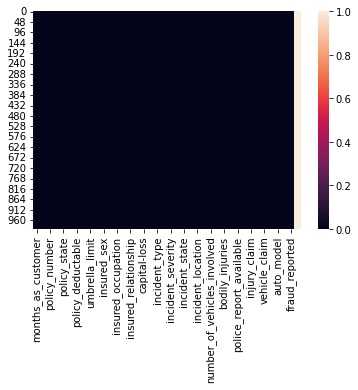

In [7]:
#Checking null values using heatmap
sns.heatmap(df.isnull())
plt.show()

In [8]:
#Total number of null values in complete dataset
df.isnull().sum().sum()

1000

#### As we can see there are many NULL values in whole dataframe

In [9]:
#number of null values in each column
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

#### _c39 column have all elements as NULL hence dropping it

In [10]:
df.drop(['_c39'], axis=1, inplace=True)

In [11]:
df.isnull().sum().sum()

0

#### Now There is no NULL values in datatframe

### Histogram Plots :

In [12]:
#Making dataframe of nominal data
df_visualisation_nominal = df[['policy_state','policy_csl','policy_deductable','umbrella_limit','insured_sex','insured_education_level','insured_occupation','insured_relationship','incident_type','collision_type','incident_severity','incident_state','incident_hour_of_the_day','number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available','auto_make','fraud_reported']].copy()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


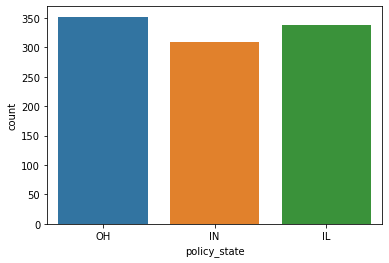

In [13]:
#Visualisation of policy_state data
ax = sns.countplot(x='policy_state',data=df_visualisation_nominal)
print(df_visualisation_nominal['policy_state'].value_counts())

**Highest number of Policy state is OH, then IL and finally IN** 

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


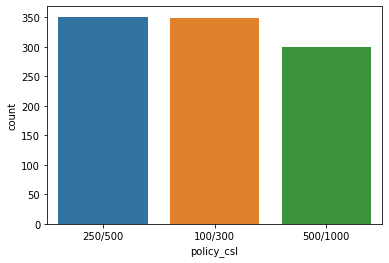

In [14]:
#Visualisation of policy_csl data
ax = sns.countplot(x='policy_csl',data=df_visualisation_nominal)
print(df_visualisation_nominal['policy_csl'].value_counts())

**Highest number of polisy csl is 250/500, then comes 100/300 and finally 500/1000** 

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


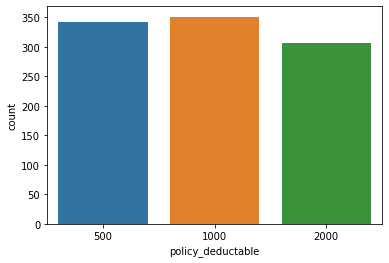

In [15]:
#Visualisation of policy_deductable data
ax = sns.countplot(x='policy_deductable',data=df_visualisation_nominal)
print(df_visualisation_nominal['policy_deductable'].value_counts())

**Most insurance have 1000 as policy deductable, then comes 500 and finally 2000** 

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64


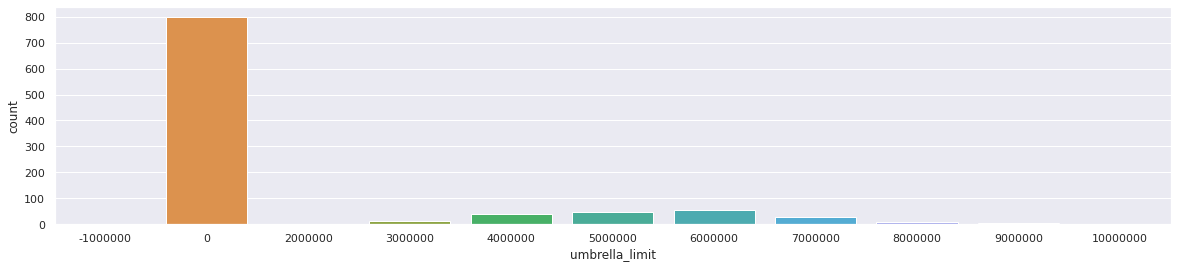

In [16]:
#Visualisation of umbrella_limit data
sns.set(rc={'figure.figsize':(20,4)})
ax = sns.countplot(x='umbrella_limit',data=df_visualisation_nominal)
print(df_visualisation_nominal['umbrella_limit'].value_counts())

**Most insurance have 0 umbrella limit** 

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


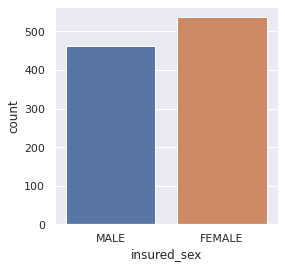

In [17]:
#Visualisation of insured_sex data
sns.set(rc={'figure.figsize':(4,4)})
ax = sns.countplot(x='insured_sex',data=df_visualisation_nominal)
print(df_visualisation_nominal['insured_sex'].value_counts())

**Most number of insured customer is female** 

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


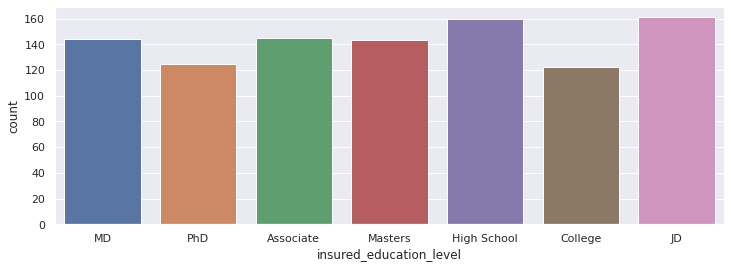

In [18]:
#Visualisation of insured_education_level data
sns.set(rc={'figure.figsize':(12,4)})
ax = sns.countplot(x='insured_education_level',data=df_visualisation_nominal)
print(df_visualisation_nominal['insured_education_level'].value_counts())

**Most insured customers are JD and High school graduate** 

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


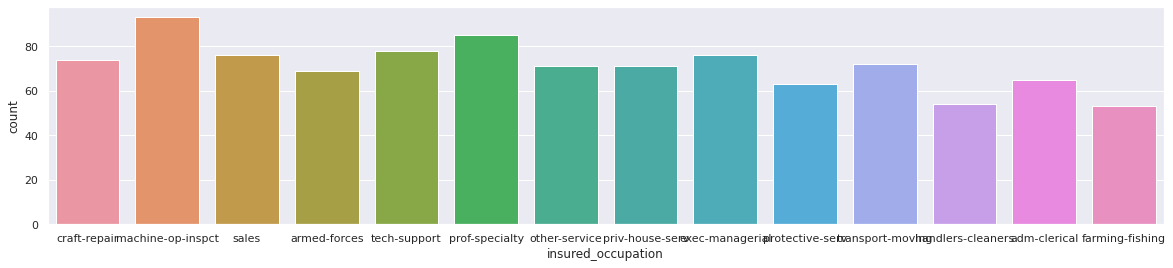

In [19]:
#Visualisation of insured_occupation data
sns.set(rc={'figure.figsize':(20,4)})
ax = sns.countplot(x='insured_occupation',data=df_visualisation_nominal)
print(df_visualisation_nominal['insured_occupation'].value_counts())

**Most insured customers are in machine-op-inspct occupation** 

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


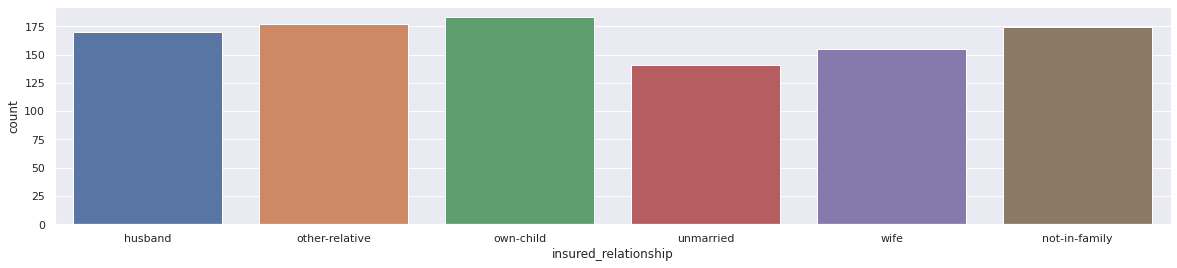

In [20]:
#Visualisation of insured_relationship data
ax = sns.countplot(x='insured_relationship',data=df_visualisation_nominal)
print(df_visualisation_nominal['insured_relationship'].value_counts())

**Most number of insured relationship is own child, then oter-relatives,then husband, and so on** 

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


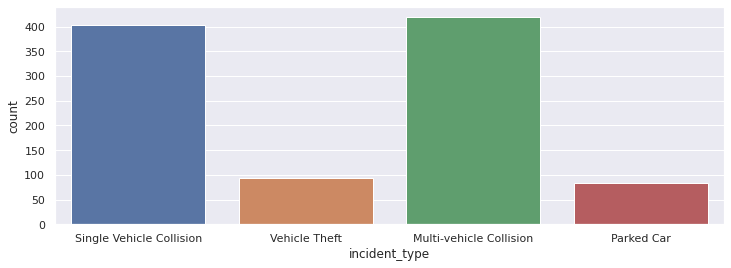

In [21]:
#Visualisation of incident_type data
sns.set(rc={'figure.figsize':(12,4)})
ax = sns.countplot(x='incident_type',data=df_visualisation_nominal)
print(df_visualisation_nominal['incident_type'].value_counts())

**Highest incident type is Vehicle Collision** 

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


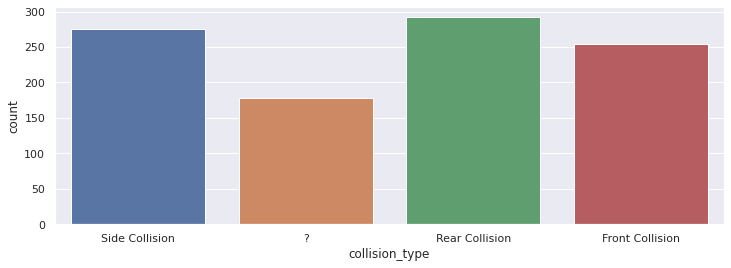

In [22]:
#Visualisation of collision_type data
ax = sns.countplot(x='collision_type',data=df_visualisation_nominal)
print(df_visualisation_nominal['collision_type'].value_counts())

**Most collisions are Rear collisions, then side collisions, then front collisions and the others are unknown** 

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


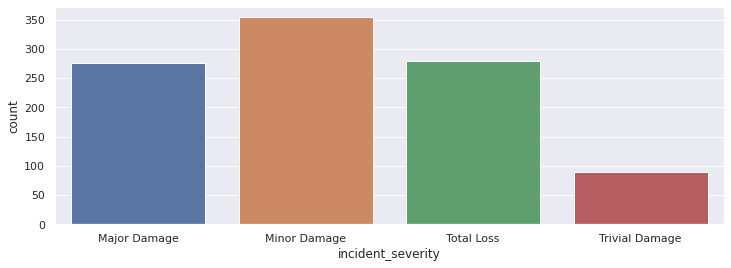

In [23]:
#Visualisation of incident_severity data
ax = sns.countplot(x='incident_severity',data=df_visualisation_nominal)
print(df_visualisation_nominal['incident_severity'].value_counts())

**Most incidents have minor damage, then comes Total loss and Major damage and Trivial damage are least** 

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


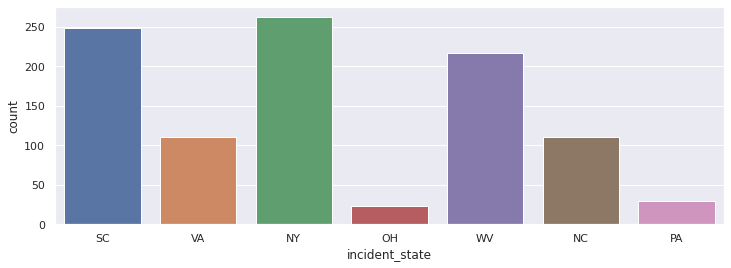

In [24]:
#Visualisation of incident_state data
ax = sns.countplot(x='incident_state',data=df_visualisation_nominal)
print(df_visualisation_nominal['incident_state'].value_counts())

**Most accidents happened in NY,SC and WV** 

17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64


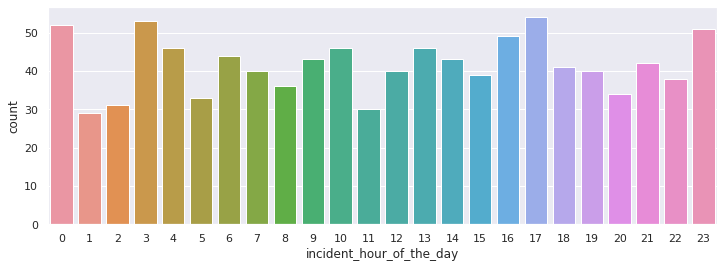

In [25]:
#Visualisation of incident_hour_of_the_day data
ax = sns.countplot(x='incident_hour_of_the_day',data=df_visualisation_nominal)
print(df_visualisation_nominal['incident_hour_of_the_day'].value_counts())

**Highest accidents occur at 17:00 hours** 

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


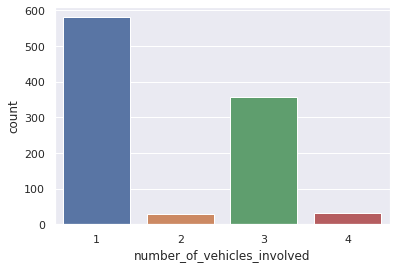

In [26]:
#Visualisation of number_of_vehicles_involved data
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x='number_of_vehicles_involved',data=df_visualisation_nominal)
print(df_visualisation_nominal['number_of_vehicles_involved'].value_counts())

**Most of the accidents involve only 1 vehicle, some involve 3 and the rest are negligible** 

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


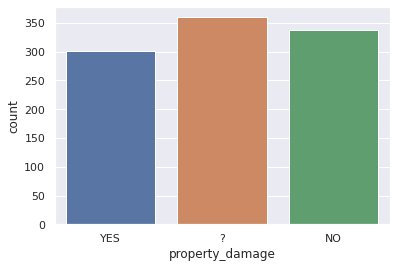

In [27]:
#Visualisation of property_damage data
ax = sns.countplot(x='property_damage',data=df_visualisation_nominal)
print(df_visualisation_nominal['property_damage'].value_counts())

**Most of the times it is unknown whether property was damaged or not, some times it was not damaged and least number of times it was damaged**

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


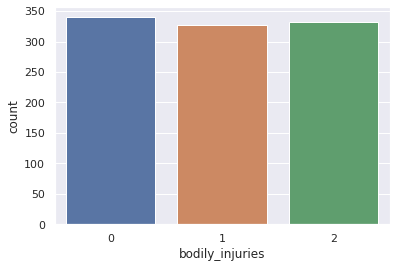

In [28]:
#Visualisation of bodily_injuries data
ax = sns.countplot(x='bodily_injuries',data=df_visualisation_nominal)
print(df_visualisation_nominal['bodily_injuries'].value_counts())

**Most of the times bodily injuries were there and only 1/3rd times it was not there** 

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


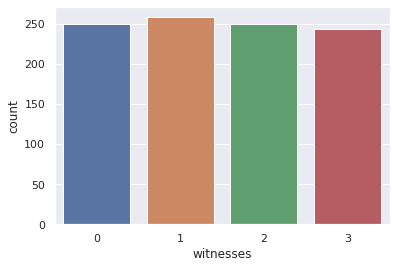

In [29]:
#Visualisation of witnesses data
ax = sns.countplot(x='witnesses',data=df_visualisation_nominal)
print(df_visualisation_nominal['witnesses'].value_counts())

**Most of the time there were witnesses and only 1/4th time witnesses were not there** 

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


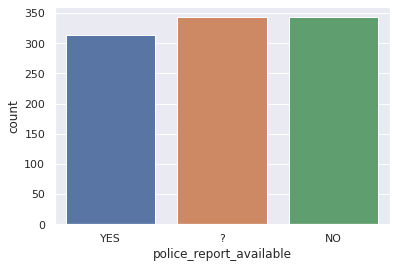

In [30]:
#Visualisation of police_report_available data
ax = sns.countplot(x='police_report_available',data=df_visualisation_nominal)
print(df_visualisation_nominal['police_report_available'].value_counts())

**Most of the time police report was not available, some times it was available and other times it is unknown**

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


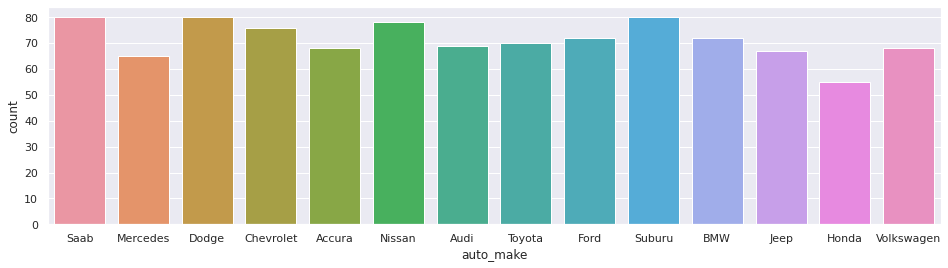

In [31]:
#Visualisation of auto_make data
sns.set(rc={'figure.figsize':(16,4)})
ax = sns.countplot(x='auto_make',data=df_visualisation_nominal)
print(df_visualisation_nominal['auto_make'].value_counts())

**Many brands of vehicles are involved in accidents** 

N    753
Y    247
Name: fraud_reported, dtype: int64


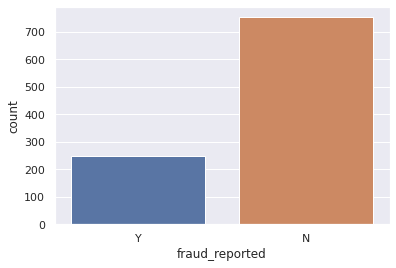

In [32]:
#Visualisation of fraud_reported data
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x='fraud_reported',data=df_visualisation_nominal)
print(df_visualisation_nominal['fraud_reported'].value_counts())

**Most frauds were not reported. Here we can also see that our target variable has imbalance** 

### Density Plots:

In [33]:
#Making dataframe of Continous data
df_visualisation_continous = df[['months_as_customer','age','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim']].copy()

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

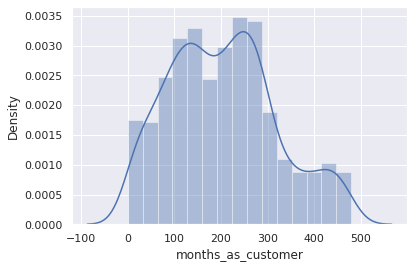

In [34]:
#Visualisation of months_as_customer data
sns.distplot(df_visualisation_continous['months_as_customer'])

**It does not look normalized**

<AxesSubplot:xlabel='age', ylabel='Density'>

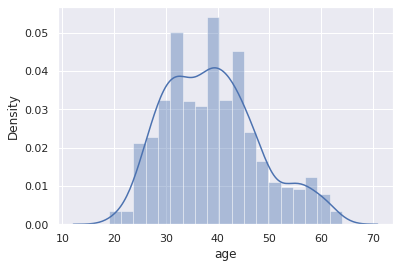

In [35]:
#Visualisation of Age data
sns.distplot(df_visualisation_continous['age'])

**It does not look normalized**

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

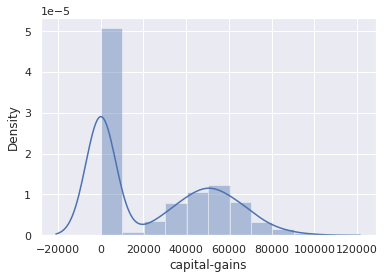

In [36]:
#Visualisation of capital-gains data
sns.distplot(df_visualisation_continous['capital-gains'])

**It does not look normalized**

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

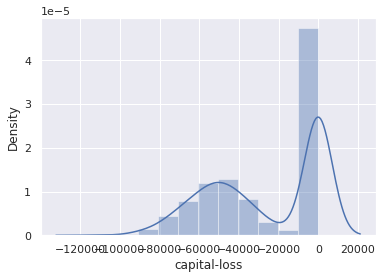

In [37]:
#Visualisation of capital-loss data
sns.distplot(df_visualisation_continous['capital-loss'])

**It does not look normalized as it has dual nodes**

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

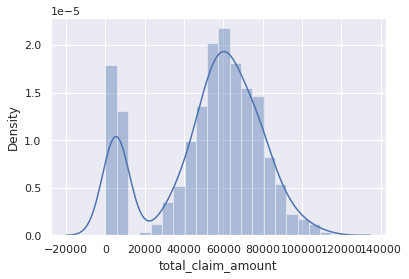

In [38]:
#Visualisation of incident_hour_of_the_day data
sns.distplot(df_visualisation_continous['total_claim_amount'])

**It does not look normalized as it has dual nodes**

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

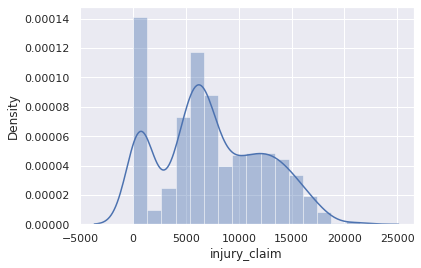

In [39]:
#Visualisation of injury_claim data
sns.distplot(df_visualisation_continous['injury_claim'])

**It does not look normalized**

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

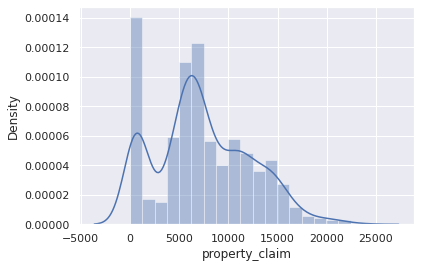

In [40]:
#Visualisation of property_claim data
sns.distplot(df_visualisation_continous['property_claim'])

**It does not look normalized**

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

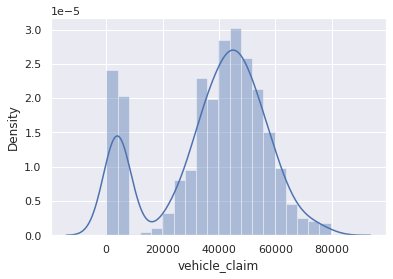

In [41]:
#Visualisation of vehicle_claim data
sns.distplot(df_visualisation_continous['vehicle_claim'])

**It does not look normalized as it has dual nodes**

#### Visualisation is completed

### Encoding of Dataframe(Converting String to numeric):

In [42]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [43]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [44]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,...,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,5000000,441714,...,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


### Correlations:

<AxesSubplot:>

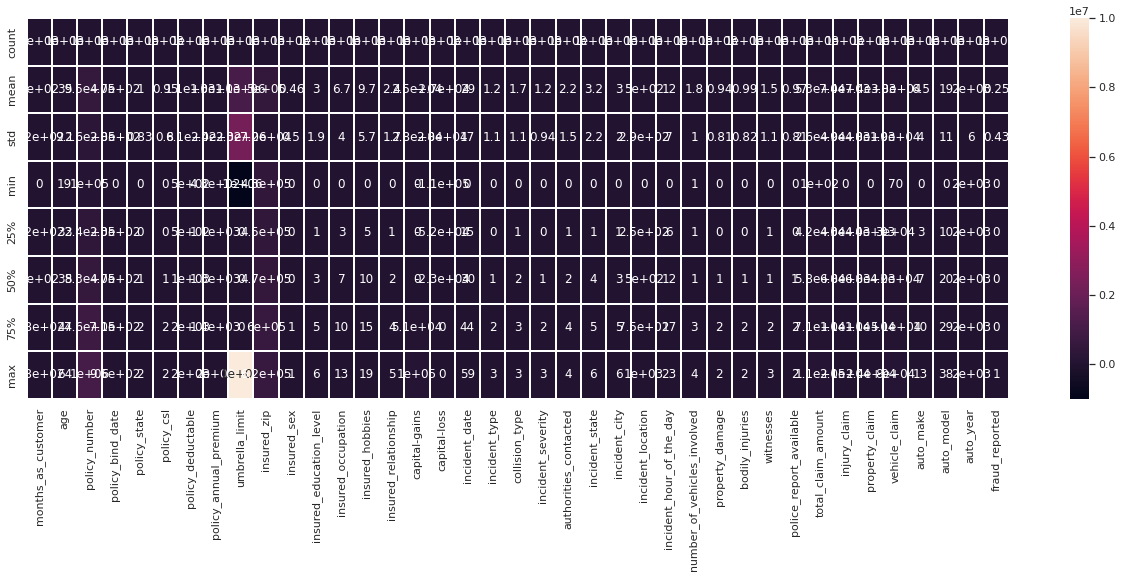

In [45]:
plt.figure(figsize = (22,7))
sns.heatmap(df.describe(),annot = True, linewidths=0.1)

In [46]:
#Correlation matrix
df.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


<AxesSubplot:>

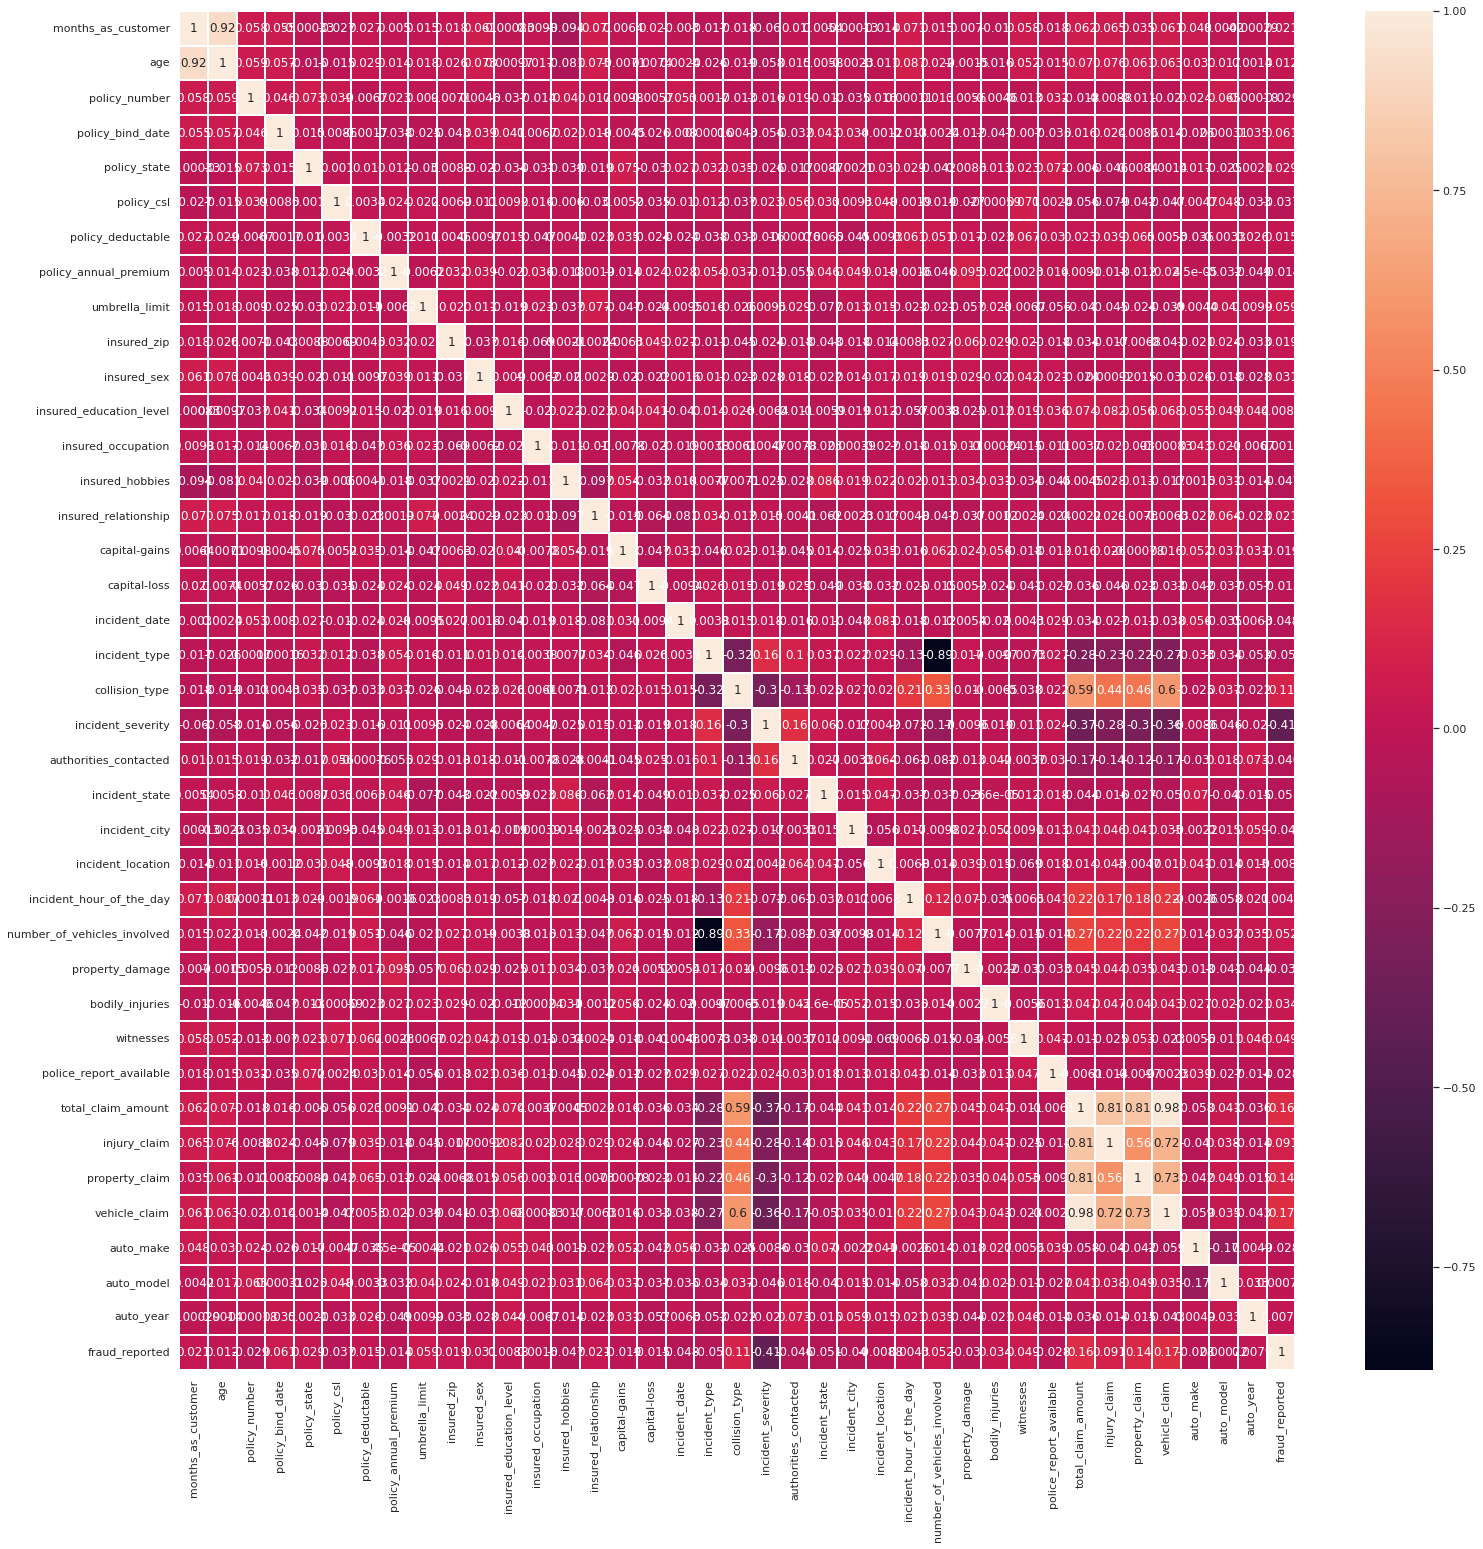

In [47]:
#Correlation of Columns with target column using heatmap
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(),annot = True, linewidths=0.1)

#### Here Age and months_as_customer seems to have very high correlation as well as total_claim_amount	also looks highly dependent on injury_claim, property_claim and vehicle_claim

In [48]:
#Checking columns which appear to be highly correlated with target columns

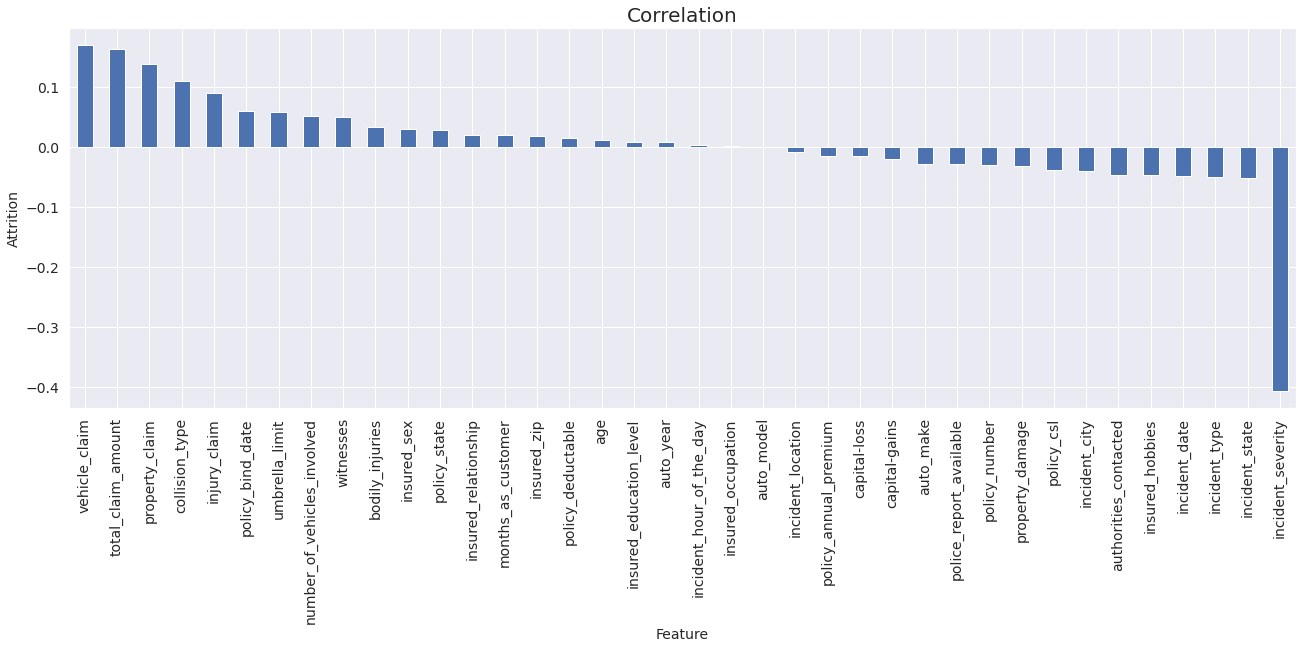

In [49]:
plt.figure(figsize=(22,7))
df.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind='bar',fontsize=14)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Attrition',fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

#### Here we can't see any very high correlation with target column

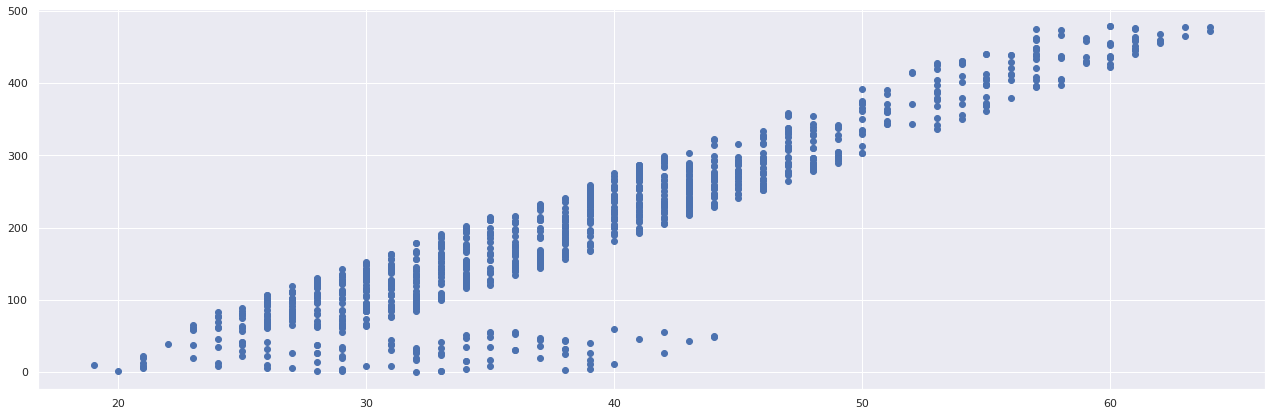

In [50]:
#Checking correlation between Age and months_as_customer
plt.figure(figsize=(22,7))
plt.scatter(df.age,df.months_as_customer)
plt.show()

#### We can see a good collinearity here

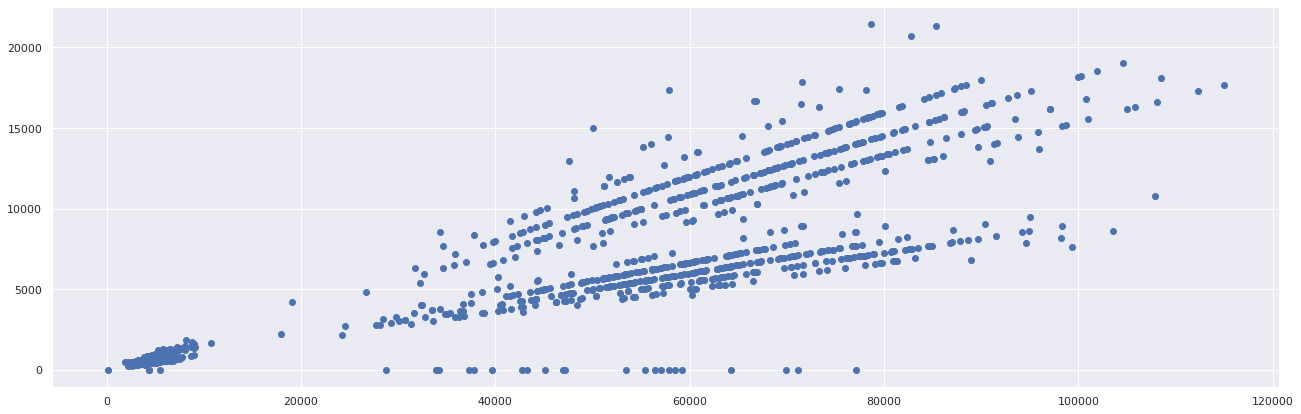

In [51]:
#Checking correlation between total_claim_amount and injury_claim
plt.figure(figsize=(22,7))
plt.scatter(df.total_claim_amount,df.injury_claim)
plt.show()

#### We can see a good collinearity here

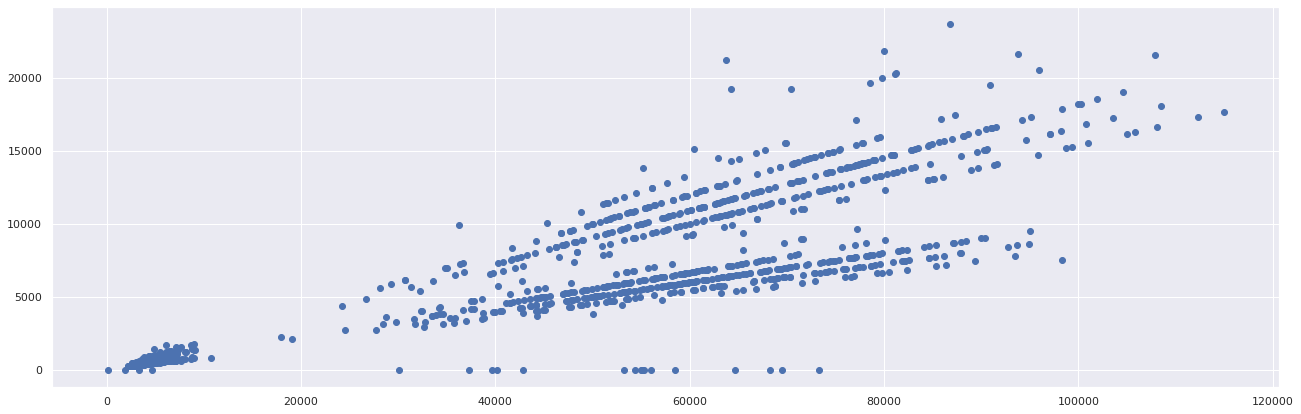

In [52]:
#Checking correlation between total_claim_amount and property_claim
plt.figure(figsize=(22,7))
plt.scatter(df.total_claim_amount,df.property_claim)
plt.show()

#### We can see a good collinearity here

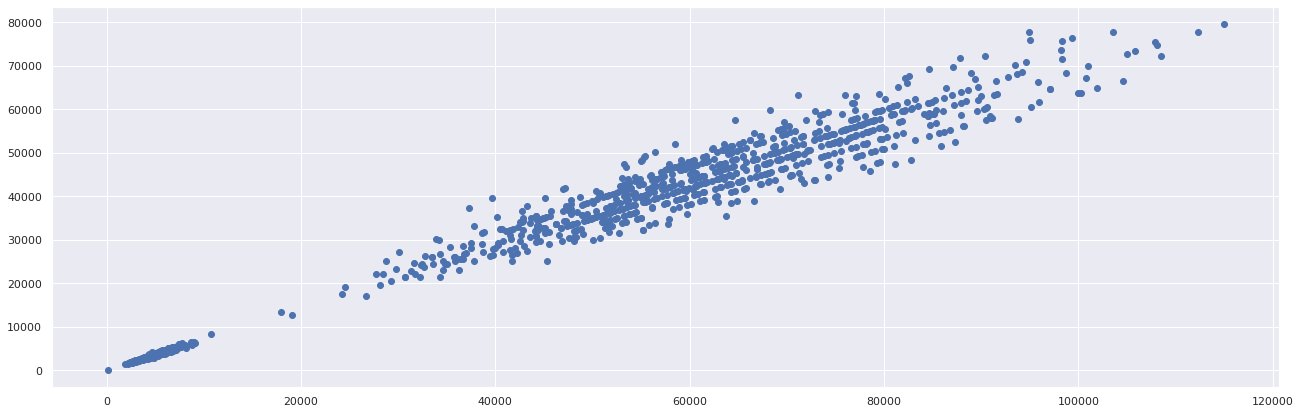

In [53]:
#Checking correlation between total_claim_amount and vehicle_claim
plt.figure(figsize=(22,7))
plt.scatter(df.total_claim_amount,df.vehicle_claim)
plt.show()

#### We can see a high collinearity here

### Checkin VIF for confirmation of above conclusion:

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
X1 = df[['age', 'months_as_customer']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X1.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]

In [56]:
print(vif_dF)

              feature        VIF
0                 age  10.548089
1  months_as_customer  10.548089


### As we can see there is high correlation

In [57]:
X2 = df[['total_claim_amount','injury_claim']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X2.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

In [58]:
print(vif_dF)

              feature       VIF
0  total_claim_amount  9.398938
1        injury_claim  9.398938


### As we can see here correlation is acceptable (< 10)

In [59]:
X3= df[['total_claim_amount','property_claim']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X3.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X3.values, i)
                          for i in range(len(X3.columns))]
print(vif_dF)

              feature       VIF
0  total_claim_amount  9.743472
1      property_claim  9.743472


### As we can see here correlation is acceptable

In [60]:
X4= df[['total_claim_amount','vehicle_claim']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X4.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X4.values, i)
                          for i in range(len(X4.columns))]
print(vif_dF)

              feature        VIF
0  total_claim_amount  145.79828
1       vehicle_claim  145.79828


### As we can see there is very very high correlation

In [61]:
X5= df[['injury_claim','property_claim']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X5.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X5.values, i)
                          for i in range(len(X5.columns))]
print(vif_dF)

          feature       VIF
0    injury_claim  4.094197
1  property_claim  4.094197


### As we can see here correlation is not high

### Dropping months_as_customer and vehicle_claim columns because they are highly collinear with other columns:

In [62]:
df.drop(['months_as_customer'], axis=1, inplace=True)
df.drop(['vehicle_claim'], axis=1, inplace=True)

### Removing Skewness :

In [63]:
#Checking skewness
df.skew()

age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584


#### Acceptable skewness (-0.65,+0.65)

#### All continous columns are in acceptable skew range

### Removing outliers :

In [64]:
#Outlier check
df.dtypes

age                              int64
policy_number                    int64
policy_bind_date               float64
policy_state                   float64
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_date                  float64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_location              float64
incident_hour_of_the_day         int64
number_of_vehicles_involv

age                               AxesSubplot(0.125,0.772143;0.0824468x0.107857)
policy_number                  AxesSubplot(0.223936,0.772143;0.0824468x0.107857)
policy_bind_date               AxesSubplot(0.322872,0.772143;0.0824468x0.107857)
policy_state                   AxesSubplot(0.421809,0.772143;0.0824468x0.107857)
policy_csl                     AxesSubplot(0.520745,0.772143;0.0824468x0.107857)
policy_deductable              AxesSubplot(0.619681,0.772143;0.0824468x0.107857)
policy_annual_premium          AxesSubplot(0.718617,0.772143;0.0824468x0.107857)
umbrella_limit                 AxesSubplot(0.817553,0.772143;0.0824468x0.107857)
insured_zip                       AxesSubplot(0.125,0.642714;0.0824468x0.107857)
insured_sex                    AxesSubplot(0.223936,0.642714;0.0824468x0.107857)
insured_education_level        AxesSubplot(0.322872,0.642714;0.0824468x0.107857)
insured_occupation             AxesSubplot(0.421809,0.642714;0.0824468x0.107857)
insured_hobbies             

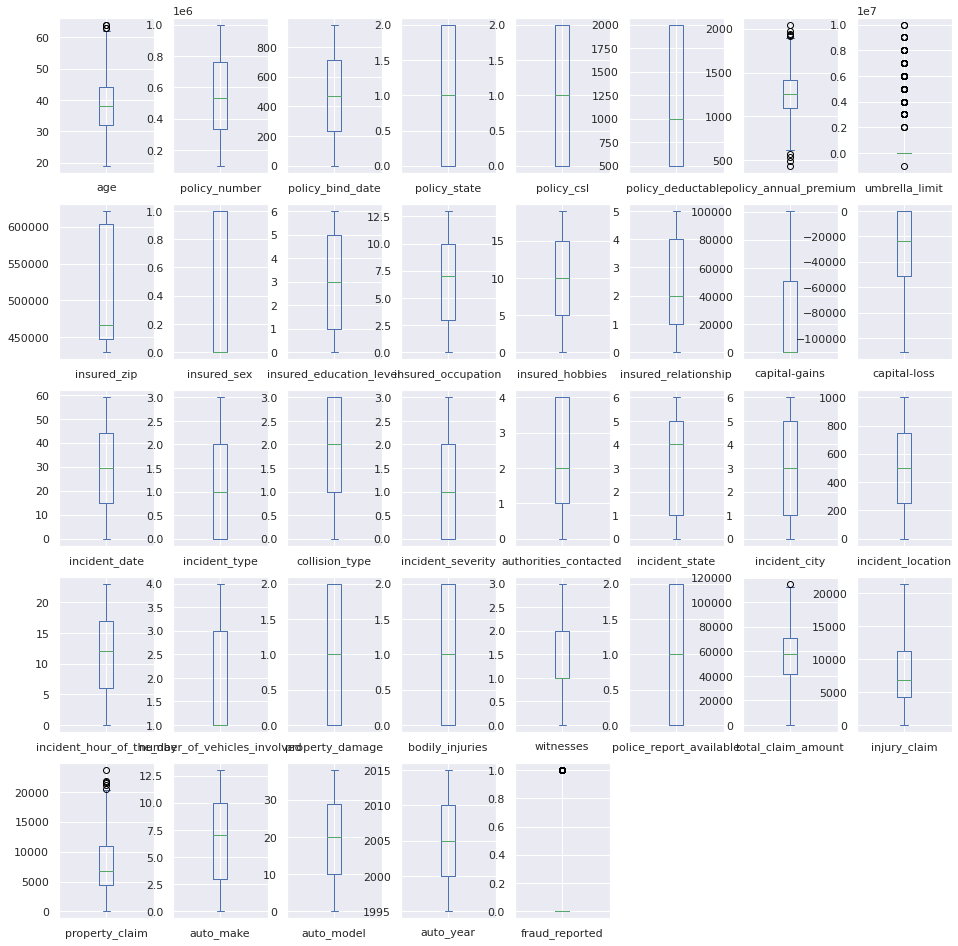

In [65]:
#Checking only for continous data types
df.plot.box(layout =(6,8),subplots=True,figsize=(16,20))

### There looks like outliers in some columns so now we check with z-score:

In [66]:
#Outlier removal using z-score
df.shape

(1000, 37)

In [67]:
from scipy.stats import zscore

z = np.abs(zscore(df))
threshhold = 3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975]),
 array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 32,  7,  7,  7,  6, 15,
         7,  7,  7]))

In [68]:
df_new_z = df[(z<3).all(axis = 1)]
df_new_z

,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported
0,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,1.0,...,1,2,2.0,71610,6510,13020,10.0,1.0,2004,1.0
1,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,1.0,...,0,0,0.0,5070,780,780,8.0,12.0,2007,1.0
2,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,0.0,...,2,3,1.0,34650,7700,3850,4.0,30.0,2007,0.0
3,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,0.0,...,1,2,1.0,63400,6340,6340,3.0,34.0,2014,1.0
4,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,1.0,...,0,1,1.0,6500,1300,650,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,0.0,...,0,1,0.0,87200,17440,8720,6.0,6.0,2006,0.0
996,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,0.0,...,2,3,0.0,108480,18080,18080,13.0,28.0,2015,0.0
997,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,0.0,...,2,3,2.0,67500,7500,7500,11.0,19.0,1996,0.0
998,62,533940,573.0,0.0,2.0,2000,1356.92,5000000,441714,1.0,...,0,1,2.0,46980,5220,5220,1.0,5.0,1998,0.0


In [69]:
df_new_z.shape

(980, 37)

In [70]:
#Data Loss
Data_loss = (1000-980)/1000*100
Data_loss

2.0

#### As we can see that all outliers are removed

## Separating the columns into features and target:

In [71]:
feature = df_new_z.drop("fraud_reported",axis=1)
target = df_new_z["fraud_reported"]

### Upsampling to remove Imbalance classification of target variable (fraud_reported):

In [72]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print(Counter(target))

# Using oversampling
oversample = RandomOverSampler(sampling_strategy='minority')

feature_over, target_over = oversample.fit_resample(feature, target)

print(Counter(target_over))

Counter({0.0: 740, 1.0: 240})
Counter({1.0: 740, 0.0: 740})


### Model 1:

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature_over,target_over,test_size = 0.2,random_state = i)
    lr.fit(features_train,target_train)
    pred_train = lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(accuracy_score(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(accuracy_score(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 0.5869932432432432
At random state 0 the testing accuracy is : 0.5945945945945946


At random state 1 the training accuracy is : 0.5658783783783784
At random state 1 the testing accuracy is : 0.6351351351351351


At random state 2 the training accuracy is : 0.6097972972972973
At random state 2 the testing accuracy is : 0.581081081081081


At random state 3 the training accuracy is : 0.5785472972972973
At random state 3 the testing accuracy is : 0.6081081081081081


At random state 4 the training accuracy is : 0.5785472972972973
At random state 4 the testing accuracy is : 0.6047297297297297


At random state 5 the training accuracy is : 0.5827702702702703
At random state 5 the testing accuracy is : 0.5641891891891891


At random state 6 the training accuracy is : 0.589527027027027
At random state 6 the testing accuracy is : 0.5844594594594594


At random state 7 the training accuracy is : 0.59375
At random state 7 the testing accuracy is : 0.

In [76]:
features_train,features_test,target_train,target_test = train_test_split(feature_over,target_over,test_size = 0.2,random_state = 7)

In [77]:
lr.fit(features_train,target_train)

LogisticRegression()

In [78]:
pred_test = lr.predict(features_test)

In [79]:
print(accuracy_score(target_test,pred_test))

0.581081081081081


In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Confusion matrix for model : \n",confusion_matrix(target_test,pred_test))
print("Classification Report for train data : \n",classification_report(target_train,pred_train))
print("Classification Report for test data : \n",classification_report(target_test,pred_test))

Confusion matrix for model : 
 [[77 80]
 [44 95]]
Classification Report for train data : 
               precision    recall  f1-score   support

         0.0       0.51      0.48      0.49       583
         1.0       0.52      0.55      0.54       601

    accuracy                           0.52      1184
   macro avg       0.51      0.51      0.51      1184
weighted avg       0.51      0.52      0.51      1184

Classification Report for test data : 
               precision    recall  f1-score   support

         0.0       0.64      0.49      0.55       157
         1.0       0.54      0.68      0.61       139

    accuracy                           0.58       296
   macro avg       0.59      0.59      0.58       296
weighted avg       0.59      0.58      0.58       296



### Cross Validation of model:

In [81]:
Train_accuracy = accuracy_score(target_train,pred_train)
Test_accuracy = accuracy_score(target_test,pred_test)

In [82]:
from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score = cross_val_score(lr,feature_over,target_over,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
    print("\n")

At cross fold 2 the cv score is 0.5844594594594594 and accuracy score for training is 0.5152027027027027 and accuracy score for testing is 0.581081081081081


At cross fold 3 the cv score is 0.5837802103949216 and accuracy score for training is 0.5152027027027027 and accuracy score for testing is 0.581081081081081


At cross fold 4 the cv score is 0.5790540540540541 and accuracy score for training is 0.5152027027027027 and accuracy score for testing is 0.581081081081081


At cross fold 5 the cv score is 0.5871621621621621 and accuracy score for training is 0.5152027027027027 and accuracy score for testing is 0.581081081081081


At cross fold 6 the cv score is 0.5858403826953249 and accuracy score for training is 0.5152027027027027 and accuracy score for testing is 0.581081081081081


At cross fold 7 the cv score is 0.5838198285663188 and accuracy score for training is 0.5152027027027027 and accuracy score for testing is 0.581081081081081


At cross fold 8 the cv score is 0.585135135135

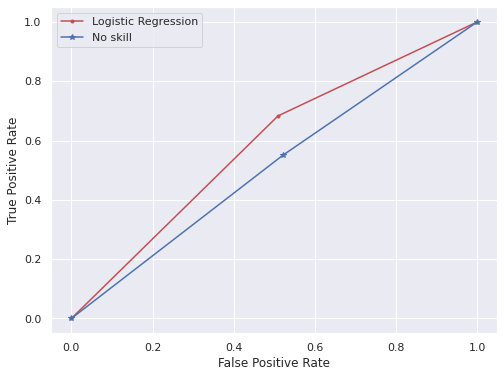

In [83]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(8,6))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(target_test, pred_test)
lr_fpr1, lr_tpr1, _ = roc_curve(target_train, pred_train)

plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression', color='r')
plt.plot(lr_fpr1, lr_tpr1, marker='*', label='No skill', color='b')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

We can see in the auc-roc curve above 

### Trying other models:

In [93]:
def model_selection(algorithm_instance,features_train,target_train,features_test,target_test):
    algorithm_instance.fit(features_train,target_train)
    model_1_pred_train = algorithm_instance.predict(features_train)
    model_1_pred_test = algorithm_instance.predict(features_test)
    print("Accuracy for the training model : ",accuracy_score(target_train,model_1_pred_train))
    print("Accuracy for the testing model : ",accuracy_score(target_test,model_1_pred_test))
    print("Confusion matrix for model : \n",confusion_matrix(target_test,model_1_pred_test))
    print("Classification Report for train data : \n",classification_report(target_train,model_1_pred_train))
    print("Classification Report for test data : \n",classification_report(target_test,model_1_pred_test))
    
    Train_accuracy = accuracy_score(target_train,model_1_pred_train)
    Test_accuracy = accuracy_score(target_test,model_1_pred_test)
    
    for j in range(2,10):
        cv_score = cross_val_score(algorithm_instance,feature_over,target_over,cv=j)
        cv_mean = cv_score.mean()
        print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
        print("\n")
        
    #Plotting auc_roc curve
    plt.figure(figsize=(8,6))

    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(target_test, model_1_pred_test)
    lr_fpr1, lr_tpr1, _ = roc_curve(target_train, pred_train)

    plt.plot(lr_fpr, lr_tpr, marker='.', label=algorithm_instance, color='r')
    plt.plot(lr_fpr1, lr_tpr1, marker='*', label='No skill', color='b')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.legend()
    plt.show()

### Model 2:

Accuracy for the training model :  0.5278716216216216
Accuracy for the testing model :  0.5337837837837838
Confusion matrix for model : 
 [[103  54]
 [ 84  55]]
Classification Report for train data : 
               precision    recall  f1-score   support

         0.0       0.52      0.64      0.57       583
         1.0       0.55      0.42      0.47       601

    accuracy                           0.53      1184
   macro avg       0.53      0.53      0.52      1184
weighted avg       0.53      0.53      0.52      1184

Classification Report for test data : 
               precision    recall  f1-score   support

         0.0       0.55      0.66      0.60       157
         1.0       0.50      0.40      0.44       139

    accuracy                           0.53       296
   macro avg       0.53      0.53      0.52       296
weighted avg       0.53      0.53      0.53       296

At cross fold 2 the cv score is 0.5175675675675675 and accuracy score for training is 0.5278716216216216

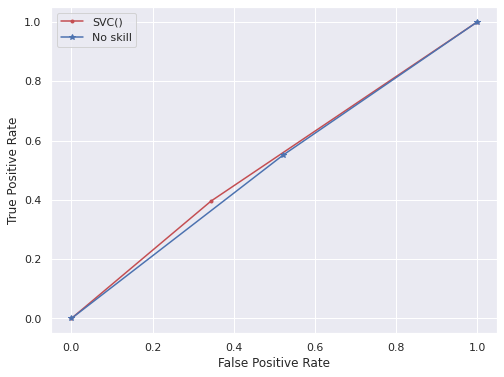

In [94]:
from sklearn.svm import SVC
model_selection(SVC(),features_train,target_train,features_test,target_test)

### Model 3:

Accuracy for the training model :  0.7989864864864865
Accuracy for the testing model :  0.652027027027027
Confusion matrix for model : 
 [[ 74  83]
 [ 20 119]]
Classification Report for train data : 
               precision    recall  f1-score   support

         0.0       0.86      0.70      0.78       583
         1.0       0.76      0.89      0.82       601

    accuracy                           0.80      1184
   macro avg       0.81      0.80      0.80      1184
weighted avg       0.81      0.80      0.80      1184

Classification Report for test data : 
               precision    recall  f1-score   support

         0.0       0.79      0.47      0.59       157
         1.0       0.59      0.86      0.70       139

    accuracy                           0.65       296
   macro avg       0.69      0.66      0.64       296
weighted avg       0.69      0.65      0.64       296

At cross fold 2 the cv score is 0.6216216216216217 and accuracy score for training is 0.7989864864864865 

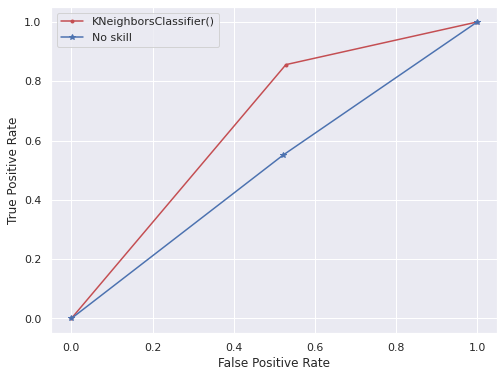

In [95]:
from sklearn.neighbors import KNeighborsClassifier
model_selection(KNeighborsClassifier(),features_train,target_train,features_test,target_test)

### Model 4:

Accuracy for the training model :  1.0
Accuracy for the testing model :  0.8986486486486487
Confusion matrix for model : 
 [[136  21]
 [  9 130]]
Classification Report for train data : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       583
         1.0       1.00      1.00      1.00       601

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

Classification Report for test data : 
               precision    recall  f1-score   support

         0.0       0.94      0.87      0.90       157
         1.0       0.86      0.94      0.90       139

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296

At cross fold 2 the cv score is 0.8878378378378378 and accuracy score for training is 1.0 and accuracy score for testin

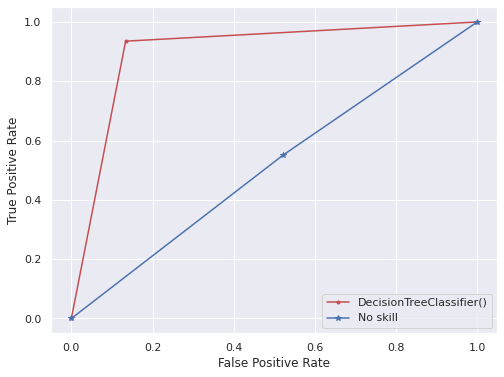

In [96]:
from sklearn.tree import DecisionTreeClassifier
model_selection(DecisionTreeClassifier(),features_train,target_train,features_test,target_test)

### Conclusion: Here DecisionTreeClassifier() gives best accuracy hence taking it as main model

### Ensemble technique:

In [97]:
from sklearn.model_selection import GridSearchCV

#using 4 parameters
parameters = {'criterion':['entropy','gini'], 'max_features': ["auto","sqrt","log2"], 'min_samples_split' : [2,5,10], 'max_depth':[2,3,5]}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 2}


In [99]:
rf = DecisionTreeClassifier(criterion = "gini", max_features = "auto", max_depth = 5, min_samples_split = 3)
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs = accuracy_score(target_test,pred_decision)
print('Accuracy score: ', abs(rfs)*100)

rfscore = cross_val_score(dt,feature,target,cv=6)
rfc =rfscore.mean()
rfc
print('Cross Validation score: ', abs(rfc)*100)

Accuracy score:  78.04054054054053
Cross Validation score:  80.00648411392089


### Conclusion : We got Accuracy score as 78.04% 